# Diabetes Prediction

In [176]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [177]:
#load data as a Pandas dataframe
diabetes_data = pd.read_csv("diabetes.csv")
heart_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [178]:
# Getting the columns of the Dataset
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [179]:
diabetes_data.shape

(768, 9)

In [180]:
# aquiring some info of the Dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [181]:
# checking for missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [182]:
# statistical measures about the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [183]:
x = diabetes_data.drop(['Outcome'], axis=1)
y = diabetes_data.Outcome

In [184]:
print(x.shape, y.shape)

(768, 8) (768,)


In [185]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [186]:
x

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [187]:
x.shape


(768, 8)

In [188]:
# Cross_val_score

# LogisticRegression()
lr_score = cross_val_score(LogisticRegression(),x,y,cv=5)
# RandomForestClassifier()
rf = cross_val_score(RandomForestClassifier(),x,y,cv=5)
# Support Vector Machine
svc = cross_val_score(SVC(gamma='auto'), x,y,cv=5)

In [189]:
lr_score,rf,svc

(array([0.77272727, 0.73376623, 0.77272727, 0.79084967, 0.77777778]),
 array([0.75974026, 0.74025974, 0.75974026, 0.83006536, 0.76470588]),
 array([0.75324675, 0.73376623, 0.77272727, 0.79084967, 0.75816993]))

In [190]:
np.average(lr_score)

0.7695696460402341

In [191]:
np.average(rf)

0.770902300314065

In [192]:
np.average(svc)

0.7617519735166793

In [193]:
# Train_Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 10)

In [194]:
print(x.shape, x_train.shape, x_test.shape) 

(768, 8) (537, 8) (231, 8)


In [204]:
print(y.shape, y_train.shape, y_test.shape) 

(768,) (537,) (231,)


In [195]:
# Hyper Parameters on SVM
model_svc_final = SVC(C=1, kernel='rbf', gamma=1)
model_svc_final.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [196]:
x_test_prediction1 = model_svc_final.predict(x_test)
test_data_accuracy1 = accuracy_score(x_test_prediction1, y_test)
print("Testing Data accuracy: ", test_data_accuracy1)

Testing Data accuracy:  0.8225108225108225


In [197]:
# Hyper Parameters on Logistic Regression
model_lr_final = LogisticRegression(max_iter = 1000)
model_lr_final.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
x_test_prediction2 = model_lr_final.predict(x_test)
test_data_accuracy2 = accuracy_score(x_test_prediction2, y_test)
print("Testing Data accuracy: ", test_data_accuracy2)

Testing Data accuracy:  0.8051948051948052


In [199]:
# Hyper Parameters on RandomForestClassifier
model_rf_final = RandomForestClassifier(n_estimators=1000)
model_rf_final.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
x_test_prediction3 = model_rf_final.predict(x_test)
test_data_accuracy3 = accuracy_score(x_test_prediction3, y_test)
print("Testing Data accuracy: ", test_data_accuracy3)

Testing Data accuracy:  0.8051948051948052


**Based on the above Evaluation we get the best accuracy score of 82% with SVM model.**

**bold text**

In [201]:
# Pickle File
import pickle
with open('diabetes_pickle','wb') as f:   
    pickle.dump(model_svc_final, f)

In [202]:
with open('diabetes_pickle','rb') as f:
    pick_model = pickle.load(f)

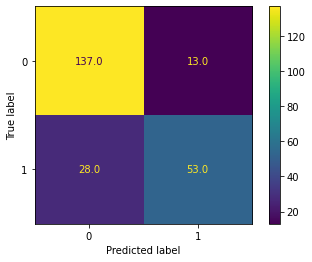

In [220]:
import sklearn
sklearn.metrics.plot_confusion_matrix(model_svc_final, x_test, y_test, values_format='.1f')
plt.show()

In [207]:
y_pred_final = model_svc_final.predict(x_test)
print(sklearn.metrics.classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       150
           1       0.80      0.65      0.72        81

    accuracy                           0.82       231
   macro avg       0.82      0.78      0.80       231
weighted avg       0.82      0.82      0.82       231

